# Elevation Data

> This page is a Jupyter Notebook that can be [found and downloaded at the GitHub repository](https://github.com/trchudley/geospatial-python-durham/blob/main/website/03_data/03_elevation.ipynb).

In [33]:
import rioxarray as rxr
import pdemtools as pdt 
import geopandas as gpd
import pystac_client
import planetary_computer

import matplotlib.pyplot as plt
from shapely.geometry import box

## Global elevation datasets

Microsoft Planetary Computer has a [large range of DEMs available](https://planetarycomputer.microsoft.com/catalog#DEMs). We can download them using `pystac_client`.

In [2]:

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [34]:
arolla_bounds = [7.483, 45.954, 7.545, 45.990]
arolla_gdf = gpd.GeoDataFrame(geometry=[box(*arolla_bounds)], crs=4326)

search = catalog.search(
    collections=["cop-dem-glo-90"],
    bbox=arolla_bounds,
)

items = list(search.items())
print(f"Returned {len(items)} items")

Returned 1 items


In [36]:
copdem = rxr.open_rasterio(items[0].assets['data'].href).rio.clip(arolla_gdf.geometry.values).squeeze()

OK, let's plot:

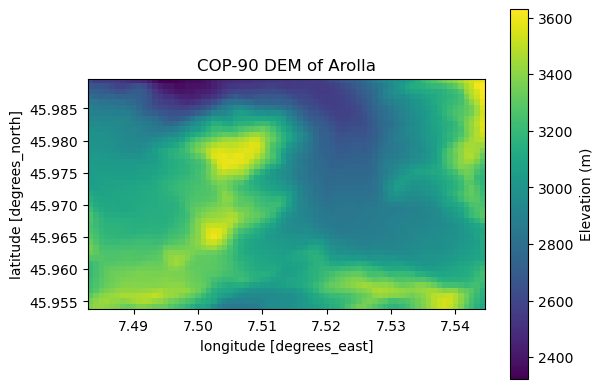

In [38]:
fig, ax = plt.subplots()

copdem.plot.imshow(ax=ax, cbar_kwargs={'label': 'Elevation (m)'})
ax.set_aspect('equal')
ax.set_title('COP-90 DEM of Arolla')
plt.show()

## ArcticDEM and REMA: `pdemtools`

The above is fine for downloading large-scale global DEMs. For managing ArcticDEM and REMA DEMs and strips, I have written an entire Python package called `pdemtools` for downloading, coregistering, calculating hillshades and terrain attributes, etc. I will not add any more documentation here as [you can consult the `pdemtools` website!](https://pdemtools.readthedocs.io)

## Calculating Crevasse Depths

If you're reading this, it might be likely that you're working with me to calculate crevasse depths. [The `crevdem` tool is available at this GitHub repo](https://github.com/trchudley/crevdem), and documentation is contained therein.